# Chapter 9 - Simulating Quantum Systems and Noise Models
This Jupyter notebook has been created from the book "Learn Quantum Computing with Python and IBM Quantum: Write your own practical quantum programs with Python", by Robert Loredo, Second Edition, Packt, Feb 25, 2025. 

It has been updated to work with Python 3.12 and the following Qiskit versions:
* Qiskit v1.3, Qiskit runtime version: 0.34
* Qiskit v 2.0, Qiskit runtime version: 0.37
|||
|-|-|
|**Author:** |Robert Loredo|
|**Reviewer:** |Alain Chancé|
|**Date:** |April 12, 2025|
|**Version:** |**1.00**<br/>*Details see at the end of this notebook*|
|**References:**|
[Robert Loredo, Learn Quantum Computing with Python and IBM Quantum: Write your own practical quantum programs with Python, Second Edition, Packt, Feb 25, 2025](https://www.packtpub.com/en-us/product/learn-quantum-computing-with-python-and-ibm-quantum-9781803240923)
[Chapter 9: Simulating Quantum Systems and Noise Models](https://www.packtpub.com/en-us/product/learn-quantum-computing-with-python-and-ibm-quantum-second-edition-9781803244808/chapter/simulating-quantum-systems-and-noise-models-9/section/simulating-quantum-systems-and-noise-models-ch09lvl1sec69)
[Packt's code repository for the book](https://github.com/PacktPublishing/Learning-Quantum-Computing-with-Python-and-IBM-Quantum-Second-Edition)
[LICENSE](https://github.com/PacktPublishing/Learning-Quantum-Computing-with-Python-and-IBM-Quantum-Second-Edition/blob/main/LICENSE)
<br/>

In [1]:
# Load helper file
%run helper_file_1.0.ipynb

Token read from file:  Token.txt
Qiskit version: 2.0.0
Qiskit runtime version: 0.37.0
/home/alain/miniconda3/bin/python
Python 3.12.9


In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerProvider, AerSimulator, QasmSimulator, StatevectorSimulator, UnitarySimulator
from qiskit.visualization import *
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

In [3]:
# Load your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Viewing all available backends

In [4]:
# View all available backends
provider = AerProvider()
provider.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

In [5]:
# View all available IBM Quantum backends
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

# Running circuits on the Aer simulator

In [6]:
# Create a quantum circuit
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all(add_bits=False)

In [7]:
# Instantiate the QASM simulator from the Aer provider
backend_simulator = QasmSimulator()

# Transpile the circuit
transpiled_qc = transpile(qc, backend_simulator)

# Run the circuit using the transpiled circuit
job = backend_simulator.run(transpiled_qc)

# Print out the result counts
result = job.result()
counts = result.get_counts(qc)
print(counts)

{'00': 483, '11': 541}


In [8]:
# Get the Aer simulator and set the backend options
aer_simulator = AerSimulator(method='statevector')
# Transpile the circuit
transpiled_qc = transpile(qc, aer_simulator)
# Run the circuit with the Aer simulator
job = aer_simulator.run(transpiled_qc)
print(job.result().get_counts(qc))

{'00': 496, '11': 528}


# Adding parameters to the backend options

In [9]:
# Run the circuit on the simulator and set the memory to True
# Run the transpiled circuit using the backend options created
job = backend_simulator.run(transpiled_qc, shots=10, memory=True)
result = job.result()

# Pull the memory slots from the results
memory = result.get_memory(transpiled_qc)

# Print the results from the memory slots
print('Memory results: ', memory)

Memory results:  ['11', '00', '00', '00', '11', '11', '11', '00', '11', '00']


# Initializing the qubits on a circuit

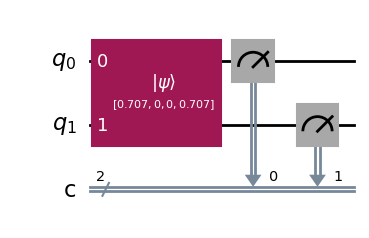

In [10]:
#Construct a 2 qubit quantum circuit
qc_init = QuantumCircuit(2, 2)

# Import numpy to simplify some math for us
import numpy as np

# Select the qubits by their index which you wish to initialize
init_qubits = [0, 1]

# Initialize qubit states
qc_init.initialize([1, 0, 0, 1] / np.sqrt(2), init_qubits)

# Add measurements and draw the initialized circuit
qc_init.measure(range(2), range(2))
qc_init.decompose()
qc_init.draw(output="mpl")

Figure 9.1: Initialized qubits to an initial state other than the zero state

In [11]:
# Set the memory to True so we can observe each result
result = backend_simulator.run(qc_init, shots=10, memory=True).result()

# Retrieve the individual results from the memory slots
memory = result.get_memory(qc_init)

# Print the memory slots
print(memory)

['00', '11', '11', '11', '00', '11', '11', '11', '00', '11']


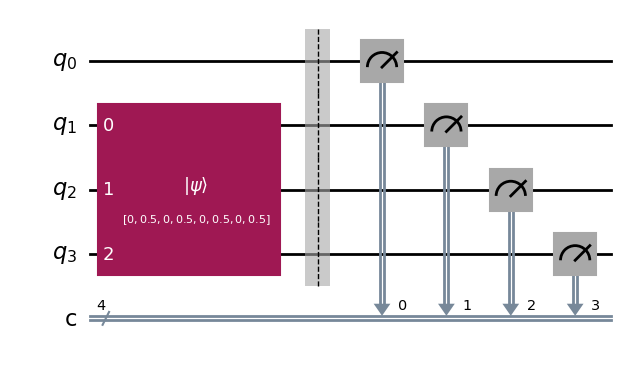

In [12]:
# Create a 4 qubit circuit
qc_init2 = QuantumCircuit(4, 4)

# Initialize only the last 3 qubits
initialized_qubits = [1, 2, 3]

# Set the initial state, remember that the sum of
# amplitudes-squared must equal 1
qc_init2.initialize([0, 1, 0, 1, 0, 1, 0, 1] / np.sqrt(4), initialized_qubits)

# Add a barrier so it is easier to read
qc_init2.barrier(range(4))

# Measure qubits, decompose and draw circuit
qc_init2.measure(range(4), range(4))
qc_init2.decompose()
qc_init2.draw(output='mpl')

Figure 9.2: Initialization of the last three qubits

{'0010': 251, '1110': 246, '1010': 267, '0110': 260}


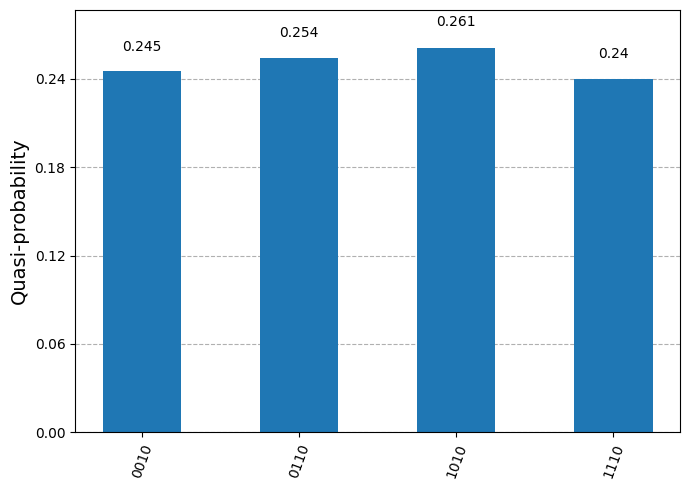

In [13]:
# Execute the circuit and print results and histogram
result = backend_simulator.run(qc_init2).result()
counts = result.get_counts(qc_init2)
print(counts)
plot_distribution(counts)

Figure 9.3: Results of initialized quantum circuit

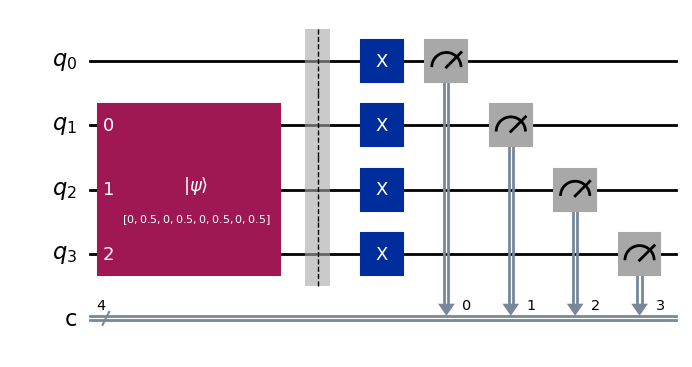

In [14]:
# Create a 4-qubit circuit
qc_init_x = QuantumCircuit(4, 4)

# Import numpy
import numpy as np

# Initialize the last 3 qubits, same as before
initialized_qubits = [1, 2, 3]
qc_init_x.initialize([0, 1, 0, 1, 0, 1, 0, 1] / np.sqrt(4), initialized_qubits)

# Add a barrier so it is easier to read
qc_init_x.barrier(range(4))

# Include an X gate on all qubits
for idx in range(4):
    qc_init_x.x(idx)

# Measure and draw the circuit
qc_init_x.measure(range(4), range(4))

# Decompose the circuit down a level
qc_init_x.decompose()

# Draw the completed circuit
qc_init_x.draw(output='mpl')

Figure 9.4: Initialized quantum circuit with X gates applied to all qubits before measuring

{'1101': 265, '1001': 249, '0001': 253, '0101': 257}


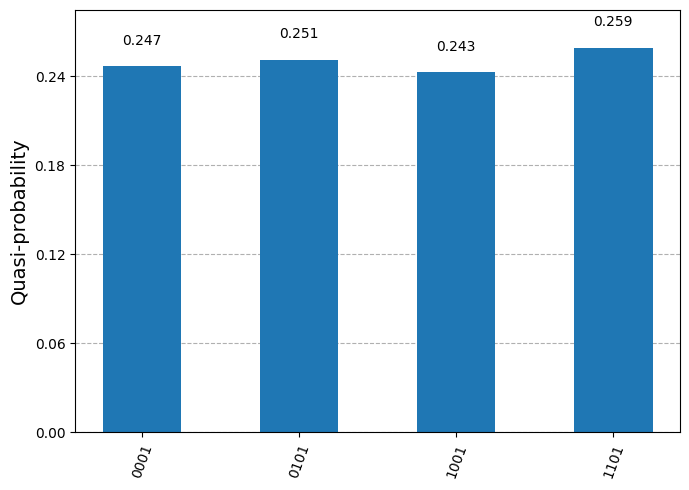

In [15]:
# Execute and get counts
result = backend_simulator.run(qc_init_x).result()
counts = result.get_counts(qc_init_x)

print(counts)
plot_distribution(counts)

Figure 9.5: Results of the initialized circuit with X gate applied to all qubits

# Running circuits on the statevector simulator

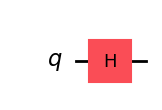

In [16]:
# Construct quantum circuit
qc = QuantumCircuit(1)

# Place qubit in superposition
qc.h(0)
qc.draw(output='mpl')

Figure 9.6: Single qubit circuit with a Hadamard gate

In [17]:
# Select the Statevector simulator from the Aer provider
simulator = StatevectorSimulator()

# Transpile the circuit
transpiled_qc = transpile(qc, simulator)

# Run the transpiled circuit
result = simulator.run(transpiled_qc).result()

# Get the state vector and display the results
statevector = result.get_statevector(transpiled_qc)
statevector

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


In [18]:
# Added by Alain Chancé
statevector.draw('latex')

<IPython.core.display.Latex object>

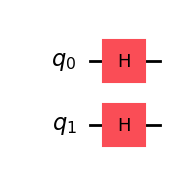

In [19]:
# Construct quantum circuit
qc = QuantumCircuit(2)

# Place both qubits in superposition
qc.h(0)
qc.h(1)
qc.draw(output='mpl')

Figure 9.7: Two qubits in superposition

In [20]:
# Transpile the circuit
transpiled_qc = transpile(qc, simulator)

# Run the circuit using the state vector simulator
result = simulator.run(transpiled_qc).result()

# Extract the state vector of the circuit from the # results
statevector = result.get_statevector(transpiled_qc)

# Output the state vector values
statevector

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


In [21]:
# Added by Alain Chancé
statevector.draw('latex')

<IPython.core.display.Latex object>

In [22]:
# Construct quantum circuit
qc = QuantumCircuit(2)

# Place the first qubit in superposition
qc.h(0)

# Entangle the two qubits together using a CNOT gate,
# where the first is the control and the second qubit is the target
qc.cx(0, 1)

# Transpile the circuit
transpiled_qc = transpile(qc, simulator)

# Run the circuit on the state vector simulator
result = simulator.run(transpiled_qc).result()

# Obtain the state vector of the circuit
statevector = result.get_statevector(transpiled_qc)

# Output the state vector values
statevector

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [23]:
# Added by Alain Chancé
statevector.draw('latex')

<IPython.core.display.Latex object>

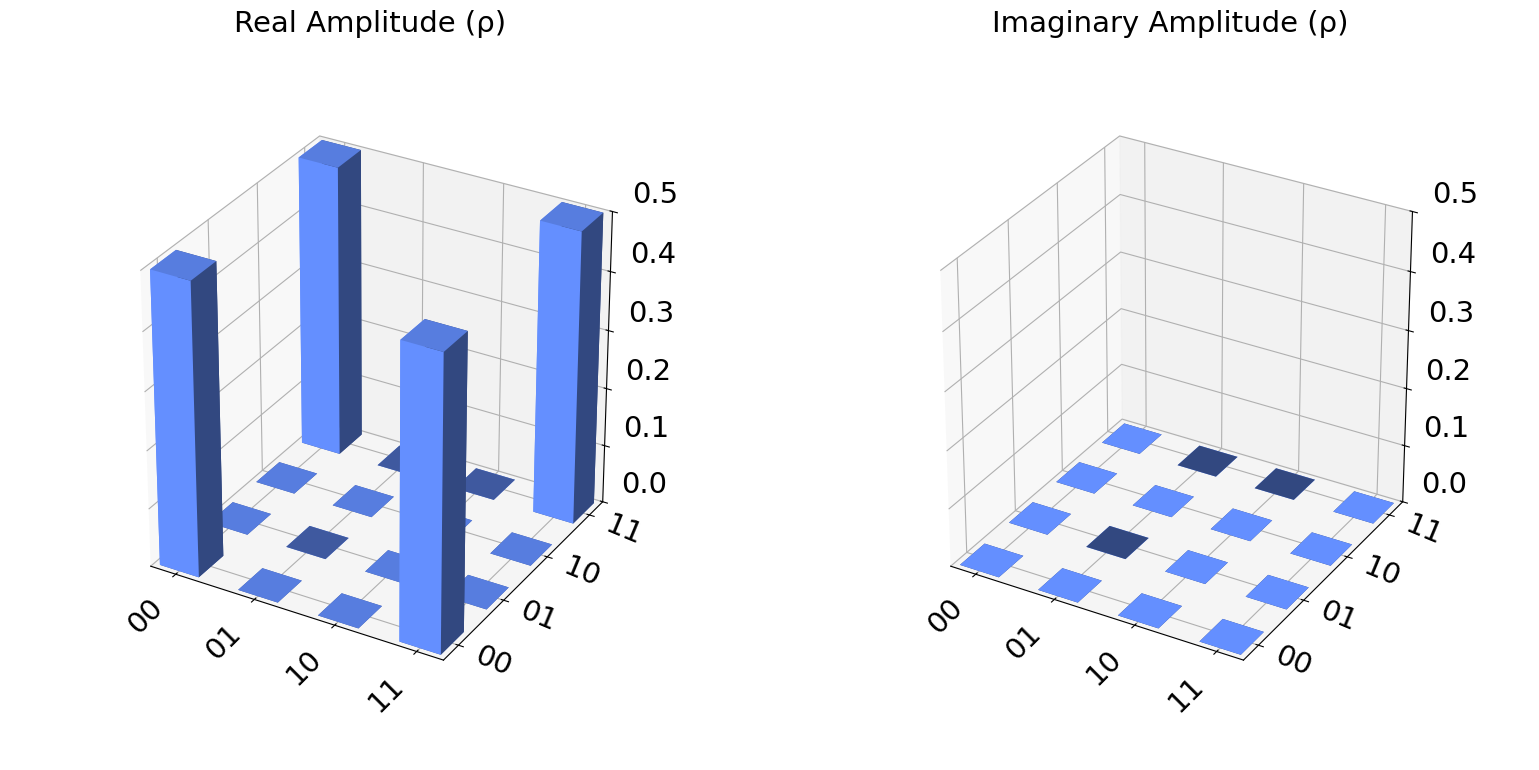

In [24]:
# Display state vector
plot_state_city(statevector)

Figure 9.8: State vector plot with real (left) and imaginary (right) components

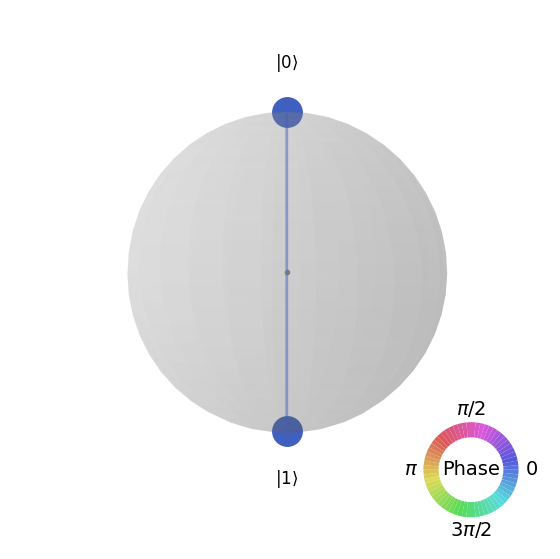

In [25]:
# Import the plot_state_qsphere class
from qiskit.visualization import plot_state_qsphere

# Create quantum circuit
qc = QuantumCircuit(1)

# Place the qubit in a superposition state
qc.h(0)

# Execute the circuit on the statevector simulator
backend = StatevectorSimulator()

# Tanspile and run the circuit on the statevector simulator
transpiled_qc = transpile(qc, backend)
result = backend.run(transpiled_qc).result()

# Display the QSphere with results from the previous cell
plot_state_qsphere(transpiled_qc)

Figure 9.9: Qsphere representation of the results after squaring the state vector results

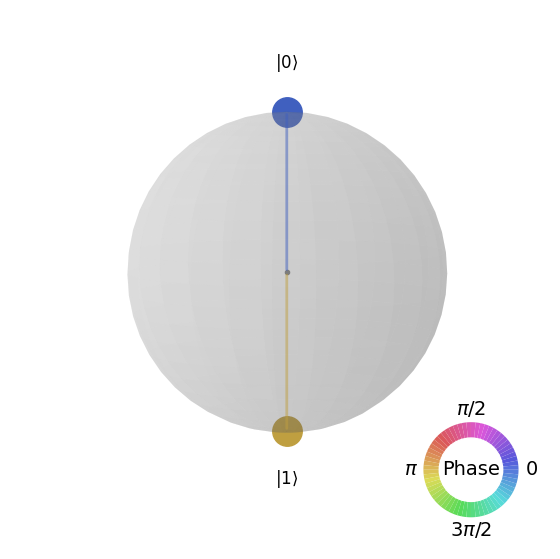

In [26]:
# Create a quantum circuit
qc = QuantumCircuit(1)

# Rotate the state from |0> to |1> by applying an X gate
qc.x(0)

# Place qubit in a superposition from the |1> state
qc.h(0)

# Transpile the circuit
transpiled_qc = transpile(qc, backend)

# Run the circuit
result = backend.run(transpiled_qc).result()

# Extract the state vector results and plot them onto the QSphere
plot_state_qsphere(result.get_statevector(transpiled_qc))

Figure 9.10: A superposition state that is also out of phase by an angle of $\pi$

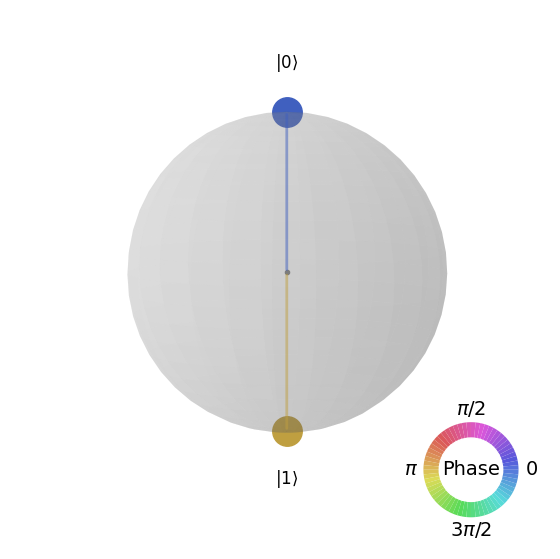

In [27]:
# Create a quantum circuit
qc = QuantumCircuit(1)

# Place qubit in a superposition from the |0> state
qc.h(0)

# Apply a Z (phase) gate, to rotate it by
# an angle π around the Z axis
qc.z(0)

# Transpile the circuit
transpiled_qc = transpile(qc, backend)

# Run the circuit
result = backend.run(transpiled_qc).result()

# Extract the state vector results and plot them onto the
# QSphere
plot_state_qsphere(result.get_statevector(transpiled_qc))

Figure 9.11: A state vector in superposition and out of phase by $\pi$

# Running circuits on the unitary simulator

In [28]:
# Create a quantum circuit and add a Hadamard gate
qc = QuantumCircuit(1)
qc.h(0)

# Set the simulator to the UnitarySimulator from the Aer provider
simulator = UnitarySimulator()

# Transpile the circuit
transpiled_qc = transpile(qc, simulator)

# Run the circuit on the unitary simulator
result = simulator.run(transpiled_qc).result()

# Extract the unitary matrix from the results
unitary = result.get_unitary(transpiled_qc)

# Print out the unitary matrix representation of the circuit
print("Unitary of the circuit:\n", unitary)

Unitary of the circuit:
 Operator([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
          [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j]],
         input_dims=(2,), output_dims=(2,))


Unitary of the circuit:
 Operator([[ 0.70710678+0.00000000e+00j,  0.70710678+8.65956056e-17j],
          [-0.70710678-8.65956056e-17j,  0.70710678+1.73191211e-16j]],
         input_dims=(2,), output_dims=(2,))


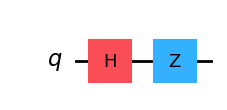

In [29]:
# Create a new circuit, adding an H gate followed by a Z gate
qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)

# Transpile the circuit
transpiled_qc = transpile(qc, simulator)

# Run the circuit on the unitary simulator
result = simulator.run(transpiled_qc).result()

# Retrieve the unitary matrix from the results
unitary = result.get_unitary(transpiled_qc)

# Print the unitary matrix representation of the circuit
print("Unitary of the circuit:\n", unitary)
qc.draw(output='mpl')

Figure 9.12: 2-gate circuit applying an H gate followed by a Z gate

In [30]:
# Create a quantum circuit
qc_init = QuantumCircuit(1)

# Set the initial unitary using the result from the
# previous example and apply it to q0
qc_init.unitary(unitary, [0])

# Transpile the circuit
transpiled_qc = transpile(qc_init, simulator)

# Execute and obtain the unitary matrix of the circuit
result = simulator.run(transpiled_qc).result()

# Retrieve the unitary matrix from the result
unitary_result = result.get_unitary(transpiled_qc)

# Print the unitary matrix results representing the circuit
print("Unitary of the circuit:\n", unitary_result)

Unitary of the circuit:
 Operator([[ 0.70710678+0.00000000e+00j,  0.70710678+8.65956056e-17j],
          [-0.70710678-8.65956056e-17j,  0.70710678+1.73191211e-16j]],
         input_dims=(2,), output_dims=(2,))


# Accounting for noise in quantum circuits
## Implementing an Aer noise model

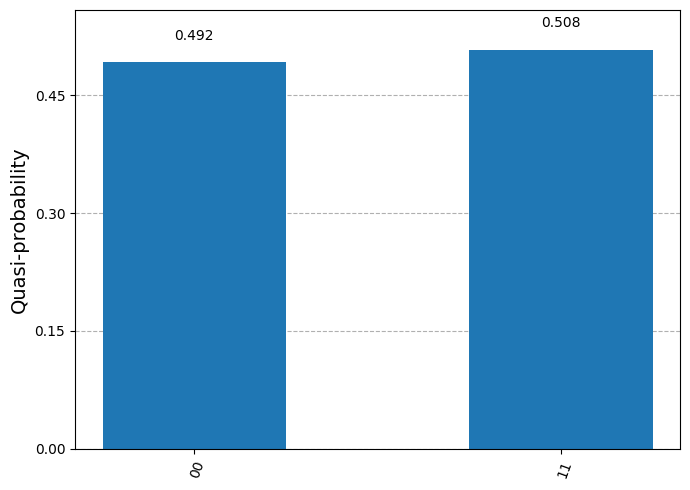

In [31]:
# Create a 2-qubit circuit
qc = QuantumCircuit(2, 2)

# Add some arbitrary gates and measurement operators
qc.h(0)
qc.cx(0, 1)

qc.measure([0, 1], [0, 1])
backend = AerSimulator()

# Transpile the circuit
transpiled_qc= transpile(qc, backend)

# Run the circuit on the Aer simulator
result = backend.run(transpiled_qc).result()

# Obtain and counts
counts = result.get_counts(transpiled_qc)

# Plot the count results on a histogram
plot_distribution(counts)

Figure 9.13: Results from an ideal simulator with no effects of noise

In [32]:
# Import the NoiseModel
from qiskit_aer.noise import NoiseModel

# Obtain an available backend to simulate
# Modified by Alain_Chancé
#backend = service.get_backend('ibm_kyoto')

# Select the least busy backend you have access to
backend = service.least_busy(simulator=False, operational=True)
print('Least busy backend: ', backend)

Least busy backend:  <IBMBackend('ibm_brisbane')>


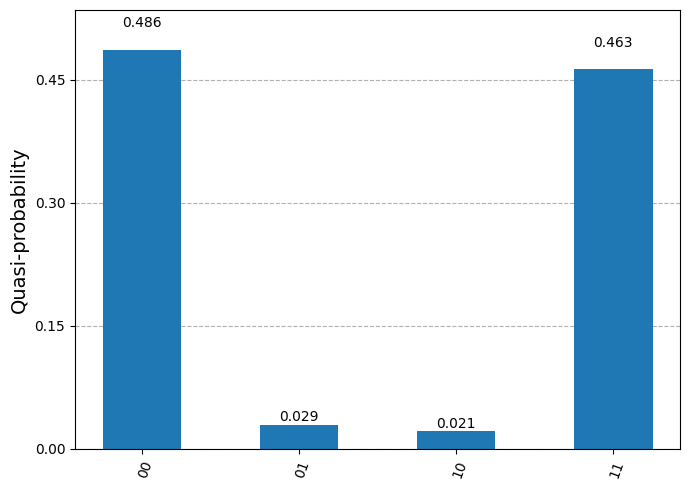

In [33]:
# Create the noise model based on the backend properties
noise_model = NoiseModel.from_backend(backend)

# Get coupling map from backend
coupling_map = backend.configuration().coupling_map

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

# Get the Aer simulator to apply noise model
noisy_simulator = AerSimulator()

# Execute the circuit on the simulator with the backend
# properties, and generated noise model
result = noisy_simulator.run(transpiled_qc,coupling_map=coupling_map,basis_gates=basis_gates,
                             noise_model=noise_model).result()

# Obtain and print results
counts = result.get_counts()
plot_distribution(counts)

Figure 9.14: Results from a simulator with noise effects based on a specified backend

# Tracing the source of noise

In [34]:
# Initialize your T1 and T2 time constant values in seconds
t1 = 0.0125
t2 = 0.0025

# Apply the T1 and T2 to create the thermal relaxation error
from qiskit_aer.noise import thermal_relaxation_error

t_error = thermal_relaxation_error(t1, t2, 0.01)
# Add the errors to a noise model
# and apply to all basis gates on all qubits
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(t_error, ['id', 'rz', 'sx','u1','u2', 'u3'])

# Print out the noise model
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u3', 'u1', 'rz', 'u2', 'sx', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'u1', 'u2', 'u3']


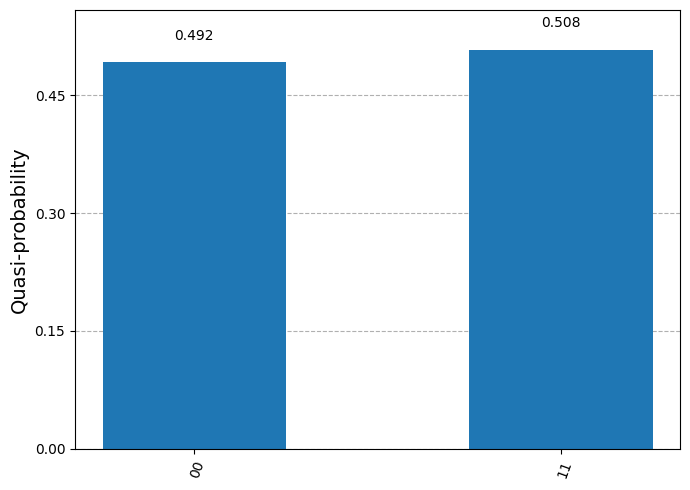

In [35]:
#Create the same 2-qubit quantum circuit as before
qc_error = QuantumCircuit(2,2)
qc_error.h(0)
qc_error.cx(0,1)
qc_error.measure(range(2), range(2))

# Set the simulator
simulator = QasmSimulator()

# Transpile the circuit
transpiled_qc = transpile(qc_error, simulator)

# Apply the noise model we created and run the circuit
result = simulator.run(transpiled_qc, shots=1024, basis_gates=noise_model.
basis_gates, noise_model=noise_model).result()

# Obtain result counts
counts = result.get_counts(transpiled_qc)

# Plot the result counts
plot_distribution(counts)

Figure 9.15: Results on a simulator with thermal relaxation errors

# Building your own noise model

In [36]:
# Create quantum circuit
qc_error = QuantumCircuit(2,2)
qc_error.h(0)
qc_error.cx(0,1)
qc_error.measure(range(2), range(2))

# Let's get the qasm simulator
simulator = QasmSimulator()

# Transpile the circuit
transpiled_qc = transpile(qc_error, simulator)

In [37]:
# Import the error classes and methods
from qiskit_aer.noise import depolarizing_error
from qiskit_aer.noise import ReadoutError

# Single and multi-qubit probability error
single_qubit_gate_p = 0.25
multi_qubit_gate_p = 0.1

# Apply the depolarizing quantum errors
single_error = depolarizing_error(single_qubit_gate_p, 1)
multi_error = depolarizing_error(multi_qubit_gate_p, 2)

In [38]:
# Add the single and multi-qubit errors to the noise # model
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(single_error, ['u2'])
noise_model.add_all_qubit_quantum_error(multi_error, ['cx'])

# Print out the noise model
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u2']
  Instructions with noise: ['u2', 'cx']
  All-qubits errors: ['u2', 'cx']


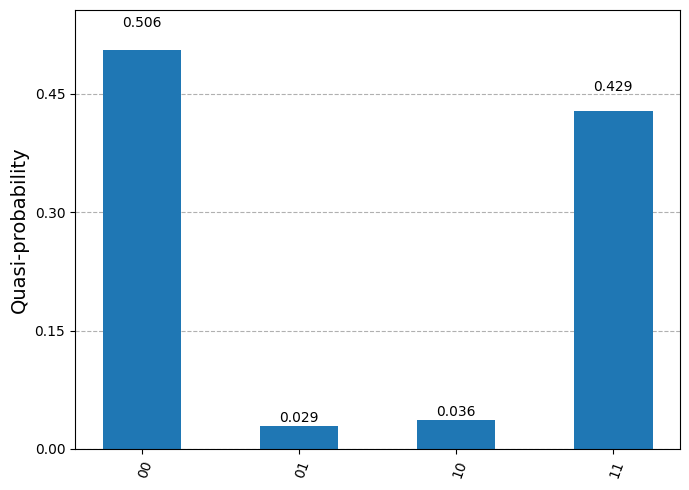

In [39]:
# Run the circuit on the simulator with the noise model
result = simulator.run(transpiled_qc, shots=1024, basis_gates=noise_model.basis_gates, noise_model=noise_model).result()

# Obtain the counts and plot the results
counts = result.get_counts(transpiled_qc)
plot_distribution(counts)

Figure 9.16: Results on a simulator with single and multi-qubit errors

In [40]:
# Set the readout error probabilities for 0 given 1,
# & 1 given 0,
p0_1 = 0.7
p1_0 = 0.2
p0 = 1 - p1_0
#Modified by Alain Chancé
#p1 = 1 - p1_1
p1 = 1 - p0_1

# Construct a noise model
noise_model = NoiseModel()

# Construct the ReadoutError with the probabilities
readout_error = ReadoutError([[p0, p1_0], [p0_1, p1]])

# Apply the readout error to all qubits
noise_model.add_all_qubit_readout_error(readout_error)

# Print the noise model
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['measure']
  All-qubits errors: ['measure']


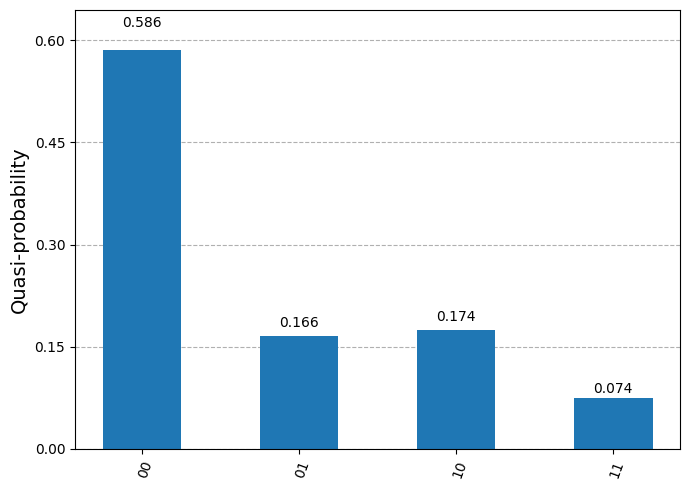

In [41]:
# Run the circuit with the readout error noise model
result = simulator.run(transpiled_qc, shots=1024, basis_gates=noise_model.basis_gates, noise_model=noise_model).result()

# Obtain the result counts and print
counts = result.get_counts(transpiled_qc)
plot_distribution(counts)

Figure 9.17: Result with effects from our custom noise model on a quantum circuit

## Print Qiskit version

In [42]:
import qiskit
print(f"Qiskit version: {qiskit.__version__}")

Qiskit version: 2.0.0


## Print Qiskit runtime version

In [43]:
import qiskit_ibm_runtime
print(f"Qiskit runtime version: {qiskit_ibm_runtime.__version__}")

Qiskit runtime version: 0.37.0


## Show Python version

In [44]:
%%bash
which python
python --version

/home/alain/miniconda3/bin/python
Python 3.12.9
